In [36]:
from ROOT import TFile
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [2]:
path="/home/aa/EPPT/run/"

In [3]:
load_file = TFile(path+"B5.root", "READ")
tree = load_file.Get('B5')

In [4]:
#Event 0 to initiate numpy array and just vstack after
tree.GetEntry(0)
dc1_xpos = np.array( getattr(tree, 'Dc1HitsVector_x') )
dc1_ypos = np.array( getattr(tree, 'Dc1HitsVector_y') )
dc1_zpos = np.array( getattr(tree, 'Dc1HitsVector_z') )


for entry in range(1, tree.GetEntries()):
    tree.GetEntry(entry)
    if (np.array( getattr(tree, 'Dc1HitsVector_x') ).size >= 5):
       dc1_xpos=np.vstack( ( dc1_xpos , np.array( getattr( tree , 'Dc1HitsVector_x' ) )[:5] ) )
    else : 
        print("Too less x hits. Reject event #", entry)
        
    if (np.array( getattr(tree, 'Dc1HitsVector_y') ).size >= 5):
       dc1_ypos=np.vstack( ( dc1_ypos , np.array( getattr( tree , 'Dc1HitsVector_y' ) )[:5] ) )
    else : 
        print("Too less y hits. Reject event #", entry)
    
    if (np.array( getattr(tree, 'Dc1HitsVector_z') ).size >= 5):
       dc1_zpos=np.vstack( ( dc1_zpos , np.array( getattr( tree , 'Dc1HitsVector_z' ) )[:5] ) )
    else : 
        print("Too less z hits. Reject event #", entry)

Too less x hits. Reject event # 169
Too less y hits. Reject event # 169
Too less z hits. Reject event # 169


In [5]:
dc2_xpos = np.array( getattr(tree, 'Dc2HitsVector_x') )
dc2_ypos = np.array( getattr(tree, 'Dc2HitsVector_y') )
dc2_zpos = np.array( getattr(tree, 'Dc2HitsVector_z') )

for entry in range(1, tree.GetEntries()):
    tree.GetEntry(entry)
    if (np.array( getattr(tree, 'Dc2HitsVector_x') ).size >= 5):
       dc2_xpos=np.vstack( ( dc2_xpos , np.array( getattr( tree , 'Dc2HitsVector_x' ) )[:5] ) )
    else : 
        print("Too less x hits. Reject event #", entry)
        
    if (np.array( getattr(tree, 'Dc2HitsVector_y') ).size >= 5):
       dc2_ypos=np.vstack( ( dc2_ypos , np.array( getattr( tree , 'Dc2HitsVector_y' ) )[:5] ) )
    else : 
        print("Too less y hits. Reject event #", entry)
    
    if (np.array( getattr(tree, 'Dc2HitsVector_z') ).size >= 5):
       dc2_zpos=np.vstack( ( dc2_zpos , np.array( getattr( tree , 'Dc2HitsVector_z' ) )[:5] ) )
    else : 
        print("Too less z hits. Reject event #", entry)

Too less x hits. Reject event # 169
Too less y hits. Reject event # 169
Too less z hits. Reject event # 169


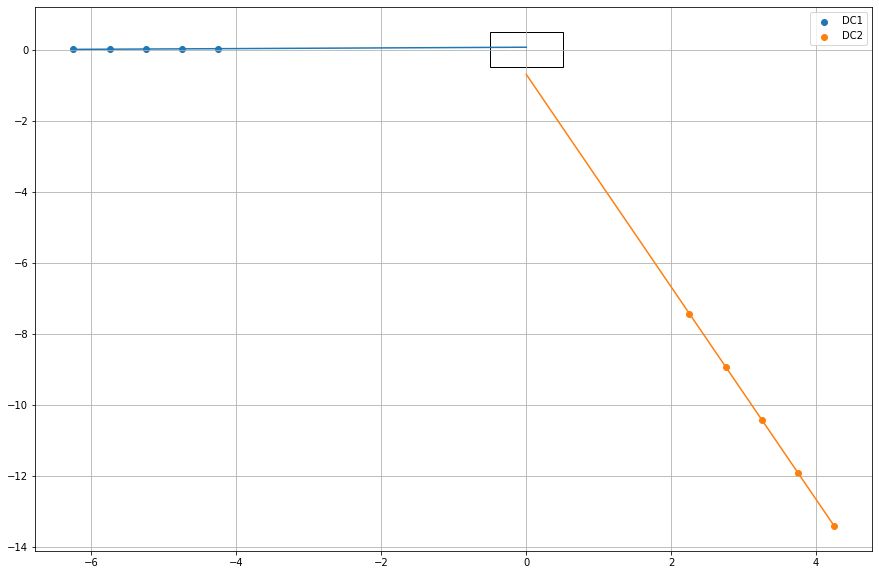

In [40]:
event = 1

def linear(x,a,b):
    return a*x+b

zPosDC1 = np.array([-6.25, -5.75, -5.25, -4.75, -4.25])
zPosDC2 = np.array([2.25, 2.75, 3.25, 3.75, 4.25])


popt1,pcov1 = optimize.curve_fit(linear,zPosDC1,dc1_xpos[event])
z1=np.linspace(-6.25,0)
x1=linear(x=z1,a=popt1[0],b=popt1[1])

popt2,pcov2 = optimize.curve_fit(linear,zPosDC2,dc2_xpos[event])
z2=np.linspace(0,4.25)
x2=linear(x=z2,a=popt2[0],b=popt2[1])


fig = plt.figure(figsize=(15,10))
plt.scatter(zPosDC1,dc1_xpos[event],label='DC1')
plt.scatter(zPosDC2, dc2_xpos[event] , label='DC2')

plt.plot(z1,x1)
plt.plot(z2,x2)

square=plt.Rectangle((-0.5,-0.5),1,1,fill=False)
plt.gca().add_patch(square)

plt.legend()

plt.grid()
plt.show()

#plt.savefig("event"+event+".png")